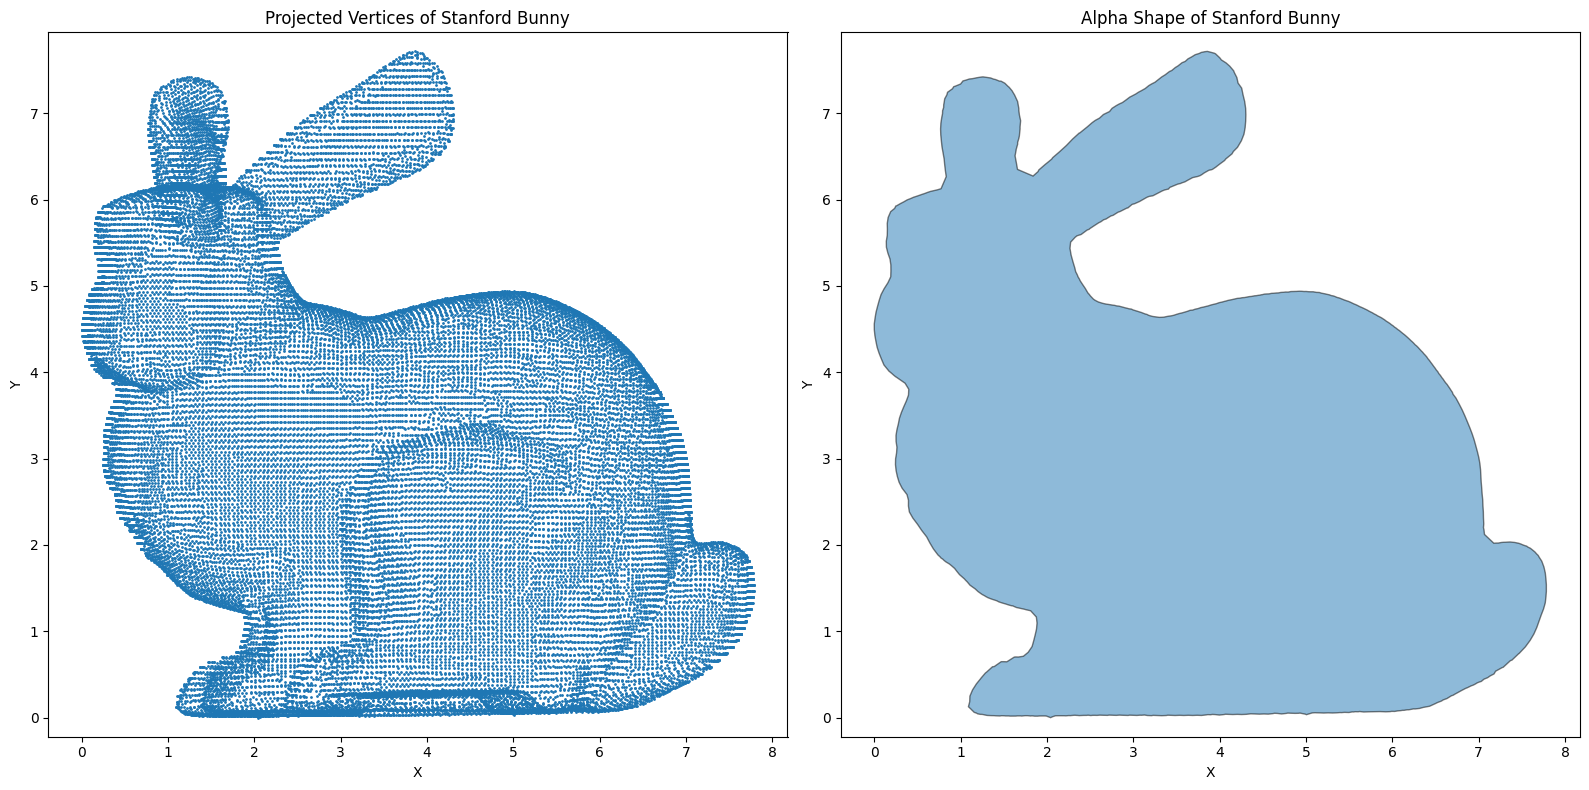

In [11]:
import trimesh
import torch
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import alphashape

bunny = trimesh.load("Resources/stanford-bunny.obj")
vertices_2d = bunny.vertices[:, :2] * 50# Take only X and Y coordinates

#shift vertices to positive values
min_x = np.min(vertices_2d[:, 0])
min_y = np.min(vertices_2d[:, 1])
vertices_2d[:, 0] -= min_x
vertices_2d[:, 1] -= min_y


#print(vertices_2d)
#vertices_2d = vertices_2d * 30

alpha_shape = alphashape.alphashape(vertices_2d, 10)


fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].scatter(*zip(*vertices_2d), s=1, label="Projected Vertices")
axs[0].set_title("Projected Vertices of Stanford Bunny")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].axis("equal")

#axs[1].scatter(*zip(*vertices_2d))
axs[1].add_patch(PolygonPatch(alpha_shape, alpha=0.5))
axs[1].set_title("Alpha Shape of Stanford Bunny")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].axis("equal")

# Show the figure
plt.tight_layout()
plt.show()


In [12]:
# import numpy as np
# import alphashape

# from shapely.geometry import Point, LineString
# import matplotlib.pyplot as plt

# gridsize = 100


# # Create a grid of points (for example, a 500x500 grid within the bounding box)
# x_min, y_min, x_max, y_max = alpha_shape.bounds

# grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, gridsize), np.linspace(y_min, y_max, gridsize))

# # Flatten the grid to compute the distance for each point
# grid_points = np.vstack([grid_x.ravel(), grid_y.ravel()]).T

# # Create an array to store the signed distances
# signed_distances = np.zeros(grid_points.shape[0])

# # Ray-casting to determine if the point is inside or outside
# def ray_casting(point, shape):
#     # Cast rays in multiple directions
#     ray_length = 1000  # Length of the ray
#     directions = [
#         (point[0] + ray_length, point[1]),  # Positive X direction
#         (point[0] - ray_length, point[1]),  # Negative X direction
#         (point[0], point[1] + ray_length),  # Positive Y direction
#         (point[0], point[1] - ray_length),  # Negative Y direction
#         (point[0] + ray_length, point[1] + ray_length),  # Diagonal top-right
#         (point[0] - ray_length, point[1] - ray_length),  # Diagonal bottom-left
#     ]
    
#     # Initialize the highest intersection count
#     highest_intersections = 0

#     # Check for intersections with the boundary in any of the directions
#     for direction in directions:
#         ray = LineString([point, direction]) # Extend the ray far away
#         intersections = shape.boundary.intersection(ray)
        
#         if intersections.geom_type == 'Point':
#             num_intersections = 1
#         elif intersections.geom_type == 'MultiPoint':
#             num_intersections = len(intersections.geoms)
#         elif intersections.geom_type == 'LineString':
#             # For LineString, we can count the number of points or segments
#             num_intersections = 0
        
#         highest_intersections = max(highest_intersections, num_intersections)

#     # If the highest number of intersections is odd, the point is inside; otherwise, outside
#     return highest_intersections

# # Compute the signed distance for each grid point
# for i, point in enumerate(grid_points):
#     point_shapely = Point(point[0], point[1])
    
#     # Compute the shortest distance to the boundary
#     distance_to_boundary = point_shapely.distance(alpha_shape.boundary)
    
#     # Use ray-casting to determine if the point is inside or outside
#     if ray_casting(point, alpha_shape) % 2 == 1:
#         signed_distances[i] = -distance_to_boundary  # Inside, negative distance
#     else:
#         signed_distances[i] = distance_to_boundary  # Outside, positive distance

# # Reshape the signed distances back to a 2D grid for visualization
# signed_distances = signed_distances.reshape(grid_x.shape)

# import matplotlib.pyplot as plt
# import matplotlib
# from matplotlib.colors import Normalize

# # Create a figure for visualization
# plt.figure(figsize=(8, 8))

# # Normalize the signed distances so that zero is the center
# norm = matplotlib.colors.Normalize(vmin=np.min(signed_distances), vmax=np.max(signed_distances))

# # Plot the SDF with the centered colormap
# contour = plt.contourf(grid_x, grid_y, signed_distances, levels=50, cmap="coolwarm", norm=norm)

# # Add a colorbar with label
# plt.colorbar(contour, label="Signed Distance")

# # Plot the zero level contour in black
# plt.contour(grid_x, grid_y, signed_distances, levels=[0], colors='black', linewidths=2)



# # Set the plot title and labels
# plt.title("Signed Distance Function with Alpha Shape as Zero Level")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.axis("equal")
# # Show the plot
# plt.show()



In [13]:
def bunny_sdf(vertices):
    import trimesh
    import alphashape
    from shapely.geometry import Point, LineString    
    # Ray-casting to determine if the point is inside or outside
    def ray_casting(point, shape):
        import numpy as np
        from shapely.geometry import LineString, MultiLineString

        ray_length = 1000  # Length of the ray
        # Define all directions as a NumPy array
        directions = np.array([
            [ray_length, 0],   # Positive X
            [-ray_length, 0],  # Negative X
            [0, ray_length],   # Positive Y
            [0, -ray_length],  # Negative Y
            [ray_length, ray_length],  # Diagonal top-right
            [-ray_length, -ray_length]  # Diagonal bottom-left
        ])

        rays = [LineString([point, point + direction]) for direction in directions]

        intersections = [shape.boundary.intersection(ray) for ray in rays]

        # Compute the number of intersections for each ray
        intersection_counts = []
        for intersection in intersections:
            if intersection.geom_type == "Point":
                intersection_counts.append(1)
            elif intersection.geom_type == "MultiPoint":
                intersection_counts.append(len(intersection.geoms))
            else:  # No valid intersection
                intersection_counts.append(0)

        # Return the maximum number of intersections across all rays
        highest_intersections = max(intersection_counts)
        return highest_intersections
        
    bunny = trimesh.load("Resources/stanford-bunny.obj")
    bunny_2dvertices = bunny.vertices[:, :2] * 50 # Take only X and Y coordinates
    
    #shift vertices to positive values
    min_x = np.min(bunny_2dvertices[:, 0])
    min_y = np.min(bunny_2dvertices[:, 1])
    bunny_2dvertices[:, 0] -= min_x
    bunny_2dvertices[:, 1] -= min_y

    alpha_shape = alphashape.alphashape(bunny_2dvertices, 10)

    sdf_values = torch.zeros(vertices.shape[0])

    # Compute the signed distance for each vertices
    for i, point in enumerate(vertices):
        point_shapely = Point(point[0], point[1])
        
        # Compute the shortest distance to the boundary
        distance_to_boundary = point_shapely.distance(alpha_shape.boundary)
        
        # Use ray-casting to determine if the point is inside or outside
        if ray_casting(point, alpha_shape) % 2 == 1:
            sdf_values[i] = -distance_to_boundary  # Inside, negative distance
        else:
            sdf_values[i] = distance_to_boundary  # Outside, positive distance


    return sdf_values



tensor([[ 1.0984,  1.0953,  1.0930,  ...,  0.9440,  0.9576, -0.9720],
        [ 1.0681,  1.0649,  1.0625,  ...,  0.9166,  0.9307,  0.9455],
        [ 1.0378,  1.0345,  1.0321,  ...,  0.8895,  0.9040,  0.9192],
        ...,
        [ 0.7301,  0.7062,  0.6827,  ...,  3.4727,  3.4773,  3.4822],
        [ 0.7489,  0.7256,  0.7028,  ...,  3.5029,  3.5075,  3.5123],
        [ 0.7684,  0.7457,  0.7234,  ...,  3.5331,  3.5376,  3.5425]])
torch.Size([256, 256])


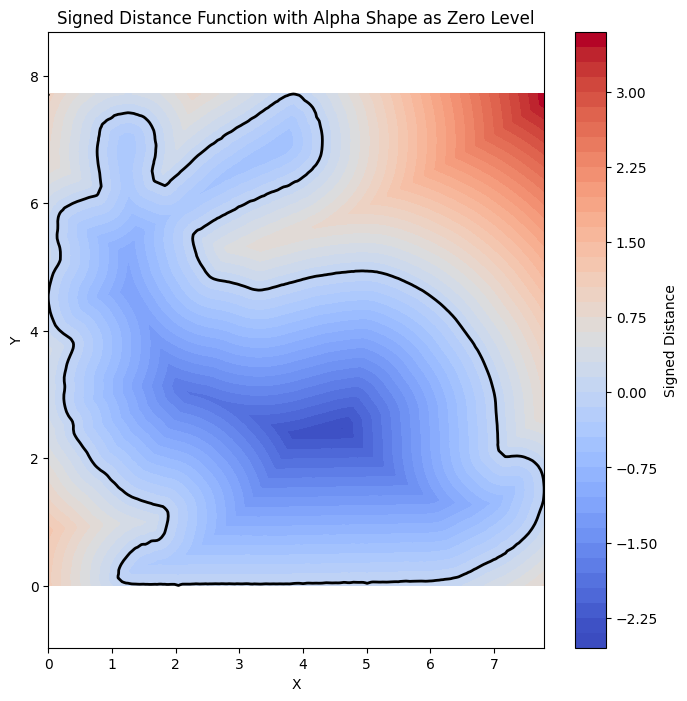

In [14]:
import matplotlib
import os
import numpy as np
import torch

# Grid size
gridsize = 256

# Create a grid of points (for example, a 100x100 grid within the bounding box of the alpha shape)
x_min, y_min, x_max, y_max = alpha_shape.bounds  # Assuming `alpha_shape` is already defined
grid_x, grid_y = torch.meshgrid(
    torch.linspace(x_min, x_max, gridsize),
    torch.linspace(y_min, y_max, gridsize),
    indexing="ij"  # Match the shape of `meshgrid` in NumPy
)

# Flatten the grid to create input points
grid_points = torch.stack([grid_x.ravel(), grid_y.ravel()], dim=1)  # Shape: (gridsize^2, 2)


# Example: Compute signed distance for the grid points
sdf_grid_path = f"sdf_grid_{gridsize}.pt"

if not os.path.exists(sdf_grid_path):
    sdf_values = bunny_sdf(grid_points)
    # Reshape the SDF values back to the grid for visualization
    sdf_grid = sdf_values.view(gridsize, gridsize)
    torch.save(sdf_grid, sdf_grid_path)
else:
    sdf_grid = torch.load(sdf_grid_path)


print(sdf_grid)
print(sdf_grid.shape)

# Optionally, convert to NumPy for plotting
sdf_grid_np = sdf_grid.cpu().numpy()


# Create a figure for visualization
plt.figure(figsize=(8, 8))

# Normalize the signed distances so that zero is the center
norm = matplotlib.colors.Normalize(vmin=np.min(sdf_grid_np), vmax=np.max(sdf_grid_np))

# Plot the SDF with the centered colormap
contour = plt.contourf(grid_x, grid_y, sdf_grid_np, levels=50, cmap="coolwarm", norm=norm)

# Add a colorbar with label
plt.colorbar(contour, label="Signed Distance")

# Plot the zero level contour in black
plt.contour(grid_x, grid_y, sdf_grid_np, levels=[0], colors='black', linewidths=2)



# Set the plot title and labels
plt.title("Signed Distance Function with Alpha Shape as Zero Level")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
# Show the plot
plt.show()

tensor([[ 1.0984,  1.0914,  1.1068,  ...,  0.8491,  0.9053, -0.9720],
        [ 0.9408,  0.9326,  0.9500,  ...,  0.6978,  0.7590,  0.8369],
        [ 0.7837,  0.7738,  0.7930,  ...,  0.5508,  0.6182,  0.7117],
        ...,
        [ 0.5832,  0.4531,  0.3248,  ...,  3.1823,  3.2047,  3.2294],
        [ 0.6751,  0.5459,  0.4255,  ...,  3.2775,  3.3620,  3.3858],
        [ 0.7684,  0.6466,  0.5297,  ...,  3.3641,  3.4958,  3.5425]])
torch.Size([50, 50])


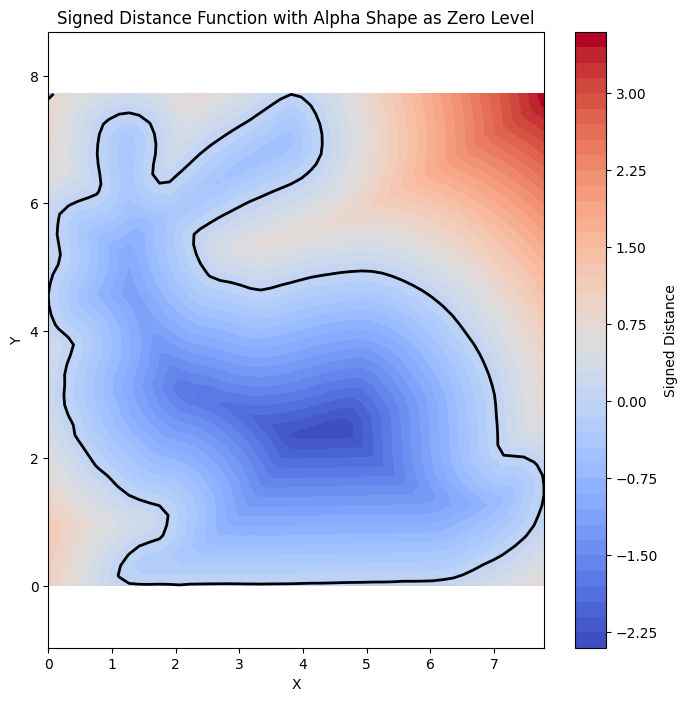

In [15]:
import torch

def interpolate_sdf(grid, points, x_min, y_min, x_max, y_max):
    """
    Interpolate SDF values for given 2D points using a precomputed SDF grid.
    Args:
        grid: SDF grid of shape (gridsize, gridsize).
        points: Input points of shape (N, 2), where each row is (x, y).
        x_min, y_min, x_max, y_max: Bounds of the grid.
    Returns:
        Interpolated SDF values at the input points of shape (N,).
    """
    # Normalize points to [0, 1] range
    points_normalized = (points - torch.tensor([x_min, y_min])) / torch.tensor([x_max - x_min, y_max - y_min])

    # Scale to grid coordinates
    gridsize = grid.shape[0]
    points_grid = points_normalized * (gridsize - 1)

    # Separate grid coordinates into integer and fractional parts
    x = points_grid[:, 0]
    y = points_grid[:, 1]
    x0 = x.floor().long().clamp(0, gridsize - 1)
    y0 = y.floor().long().clamp(0, gridsize - 1)
    x1 = (x0 + 1).clamp(0, gridsize - 1)
    y1 = (y0 + 1).clamp(0, gridsize - 1)
    dx = x - x0
    dy = y - y0

    # Perform bilinear interpolation
    values = (
        (1 - dx) * (1 - dy) * grid[x0, y0] +
        dx * (1 - dy) * grid[x1, y0] +
        (1 - dx) * dy * grid[x0, y1] +
        dx * dy * grid[x1, y1]
    )
    return values

# # Example usage
# points = torch.tensor([[0.1, 0.2], [0.3, 0.4]])  # Example 2D input points
# interpolated_sdf = interpolate_sdf(sdf_grid, points, x_min, y_min, x_max, y_max)
# print(interpolated_sdf)



# Grid size
gridsize = 50

# Create a grid of points (for example, a 100x100 grid within the bounding box of the alpha shape)
x_min, y_min, x_max, y_max = alpha_shape.bounds  # Assuming `alpha_shape` is already defined
grid_x, grid_y = torch.meshgrid(
    torch.linspace(x_min, x_max, gridsize),
    torch.linspace(y_min, y_max, gridsize),
    indexing="ij"  # Match the shape of `meshgrid` in NumPy
)

# Flatten the grid to create input points
grid_points = torch.stack([grid_x.ravel(), grid_y.ravel()], dim=1)  # Shape: (gridsize^2, 2)




interpolated_sdf = interpolate_sdf(sdf_grid, grid_points, x_min, y_min, x_max, y_max)

# Reshape the SDF values back to the grid for visualization
interpolate_sdf_grid = interpolated_sdf.view(gridsize, gridsize)

print(interpolate_sdf_grid)
print(interpolate_sdf_grid.shape)

# Optionally, convert to NumPy for plotting
sdf_grid_np = interpolate_sdf_grid.cpu().numpy()


# Create a figure for visualization
plt.figure(figsize=(8, 8))

# Normalize the signed distances so that zero is the center
norm = matplotlib.colors.Normalize(vmin=np.min(sdf_grid_np), vmax=np.max(sdf_grid_np))

# Plot the SDF with the centered colormap
contour = plt.contourf(grid_x, grid_y, sdf_grid_np, levels=50, cmap="coolwarm", norm=norm)

# Add a colorbar with label
plt.colorbar(contour, label="Signed Distance")

# Plot the zero level contour in black
plt.contour(grid_x, grid_y, sdf_grid_np, levels=[0], colors='black', linewidths=2)



# Set the plot title and labels
plt.title("Signed Distance Function with Alpha Shape as Zero Level")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
# Show the plot
plt.show()

In [16]:
print(x_min, y_min, x_max, y_max)

0.0 0.0 7.78495 7.7166999999999994
